# Tutorial Datasets

In [29]:
%load_ext autoreload
%autoreload 2

import scipy
import functools
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tsgm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Gaussian process samples

Samples from a Gaussian process are an easy way to generate a time series dataset. We will generate `N_SAMPLES` time series, with time in `(0, MAX_TIME)`.

In [45]:
MAX_TIME = 100
N_SAMPLES = 10

`tsgm.utils.get_gp_samples_data` returns samples from GP with a given `covar_func` (exponential quadratic by defult).

In [31]:
X = tsgm.utils.get_gp_samples_data(num_samples=N_SAMPLES, max_time=MAX_TIME)
ts = np.linspace(0, MAX_TIME, MAX_TIME)

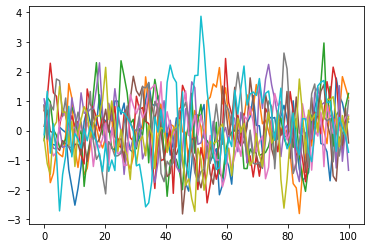

In [32]:
for sample in X:
    sns.lineplot(x=ts, y=sample[0])

Let's do the same with a periodic kernel.

In [42]:
def periodic_kernel(x, y, period):
    r = np.pi * (scipy.spatial.distance.cdist(x, y)) / period
    return np.exp(-np.sin(r) ** 2)

In [43]:
X = tsgm.utils.get_gp_samples_data(
    num_samples=N_SAMPLES, max_time=MAX_TIME,
    covar_func=functools.partial(periodic_kernel, period=20))

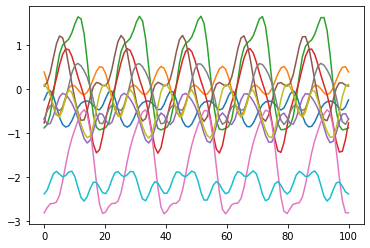

In [44]:
for sample in X:
    sns.lineplot(x=ts, y=sample[0])